# NUMPY

Unlike R/MATLAB, Python relies on libraries for numerics.

- No builtin types for numeric computation
- However, packages like `numpy` are _quasi-standard_

## Basic array type

`numpy.ndarray`, which is a multi-dimensional array of numbers.

In [64]:
import numpy as np # <- import a library, like include/require in other languages

v1 = np.array([3, 8, 6.0, 12, 5])
v1

array([ 3.,  8.,  6., 12.,  5.])

In [65]:
type(v1)

numpy.ndarray

indexing is quite trivial ...

In [66]:
print(v1[0])
print(v1[0:2])
print(v1[-1])
print(v1[:3])

3.0
[3. 8.]
5.0
[3. 8. 6.]


In [67]:
len(v1)

5

In [68]:
v1.shape

(5,)

A numpy array can be created by:
- providing a list of elements
- creating an array of zeros, or an array of ones (the resulting array contains floats by default)

In [69]:
np.array([3, 8, 6, 12])

array([ 3,  8,  6, 12])

In [70]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [71]:
np.ones(5)

array([1., 1., 1., 1., 1.])

Matrices are created in a similar way:
- by providing a list of lists
- matrix of zeros or matrix of ones

In [72]:
A = np.array([
    [0,1,2],
    [2,3,4],
    [4,5,6],
    [6,7,8]])
A

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [73]:
B = np.zeros([3, 4])

In [74]:
C = np.ones([3, 4])

In [75]:
A.shape

(4, 3)

In [76]:
print(A[0,0])
print(A[0,1])
print(A[1,0])

0
1
2


## Why do we need numpy?

Couldn't we just use lists?

In [77]:
A = np.array([1,2,3])
B = [1, 2, 3]

1. numpy arrays have extra numeric methods.
2. efficiency
3. expressiveness


In [78]:
A

array([1, 2, 3])

In [79]:
A.mean()

2.0

In [80]:
A.std()

0.816496580927726

In [81]:
A.max()

3

You can also use numeric operations with arrays, they work **element-wise**:

In [82]:
A

array([1, 2, 3])

In [83]:
A + 1

array([2, 3, 4])

In [84]:
A * 2

array([2, 4, 6])

Operations with two arrays also work **element-wise**:

In [85]:
B = np.array([1,1,2])
print(A)
print(B)

[1 2 3]
[1 1 2]


In [86]:
A + B

array([2, 3, 5])

In [87]:
A * B

array([1, 2, 6])

## Matrix/vector operations

In [88]:
A = np.array([
            [1,0,1],
            [0,2,0],
            [0,0,1]
])
B = np.array([1,2,3])

print(np.dot(A, B))

[4 4 3]


## Numpy arrays can be very efficient

A list in Python is an array of pointers to objects:


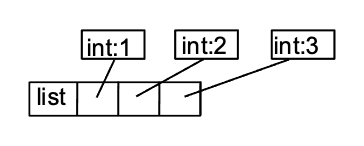

while a numpy array really does hold its data in memory:

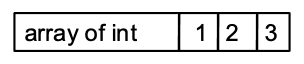

Computers are **really good** at processing contiguous blocks of memory.

These arrays can also be passed to other libraries (including those written in C or FORTRAN).

## Timing measurements

One simple example (using the magic command `%timeit`):

In [89]:
a = list(range(1024))
%timeit sum(a)

9.4 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [90]:
b = np.arange(1024)
%timeit b.sum()

2.84 µs ± 40.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Actually, not that big of a difference, but the difference gets larger for larger arrays and more complex operations:

In [91]:
a = list(range(1024*1024))
%timeit sum(v*v for v in a)

78.7 ms ± 916 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [92]:
b = np.arange(1024*1024)
%timeit (b**2).sum()

1.48 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Now, it starts to matter.

## Numpy arrays are *homogeneous*

- All members of an array have the same type
- Either integer or floating pooint
- Defined **when you first create the array**

In [93]:
A = np.array([0, 1, 2]) # <- IMPLICIT TYPE
A.dtype

dtype('int64')

In [94]:
B = np.array([0.5, 1.1, 2.1])
B.dtype

dtype('float64')

In [95]:
C = np.array([0, 1, 2], dtype=np.float64) # <- EXPLICIT TYPE
C.dtype

dtype('float64')

Besides the speed, it is also more expressive.

## Numpy data types

- `np.int8`, `np.int16`, `np.int32`, `np.int64`
- `np.uint8`, `np.uint16`, `np.uint32`, `np.uint64`
- `np.float32`, `np.float64`, `np.float16`, (and, sometimes, `np.float128`)
- `np.bool`

Note that these can over/underflow:

In [96]:
A = np.array([1,2,3], np.uint8)
A - 10

array([247, 248, 249], dtype=uint8)

## Reduce along axis operations

If you have a multidimensional array, you can reduce it along one of its axis:

In [97]:
A = np.array([
    [0,0,1],
    [1,2,3],
    [2,4,2],
    [1,0,1]])

In [98]:
A.max(axis=0)

array([2, 4, 3])

In [99]:
A.max(1)

array([1, 3, 4, 1])

In [100]:
A.mean(axis=0)

array([1.  , 1.5 , 1.75])

## Slicing

In [101]:
A = np.array([
    [0,1,2],
    [2,3,4],
    [4,5,6],
    [6,7,8]])

A.shape

(4, 3)

In [102]:
A[0]

array([0, 1, 2])

In [103]:
A[0].shape

(3,)

In [104]:
A[1]

array([2, 3, 4])

In [105]:
A[:,2]

array([2, 4, 6, 8])

## Slices share memory!

A slice is a *view* into another array:

In [106]:
A

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [107]:
B = A[0]
B[0] = -1
A

array([[-1,  1,  2],
       [ 2,  3,  4],
       [ 4,  5,  6],
       [ 6,  7,  8]])

## Argument passing is by reference

In [108]:
def double_array(A):
    A *= 2
A = np.arange(20)
double_array(A)

A

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38])

You need to be careful, but you can always make a copy:

In [109]:
A = np.arange(20)
B = A[0:10].copy()
double_array(B)
print(A)
print(B)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  4  6  8 10 12 14 16 18]


## Logical Arrays

Arrays of booleans:

In [110]:
A = np.array([-1, 0, 1, 2, -2, 3, 4, -2])
A > 0

array([False, False,  True,  True, False,  True,  True, False])

In [111]:
( (A > 0) & (A < 3) ).mean()

0.25

## Logical indexing

In [112]:
A[A < 0] = 0
A

array([0, 0, 1, 2, 0, 3, 4, 0])

## Some helper functions

In [113]:
np.zeros((4,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [114]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [115]:
A = np.array([1, 2, 3, 4, 5])
B = np.zeros_like(A)
B

array([0, 0, 0, 0, 0])